# Métodos de Undersampling que selecionam Exemplos para manter no dataset

## Near Miss Undersampling

* Seleciona exemplos para manter com base nas distâncias entre exemplos das classes majoritária e minoritária

### NearMiss-1
Seleciona os exemplos da classe majoritária que tem a menor distância média dos três exemplos da classe minoritária mais próximos.


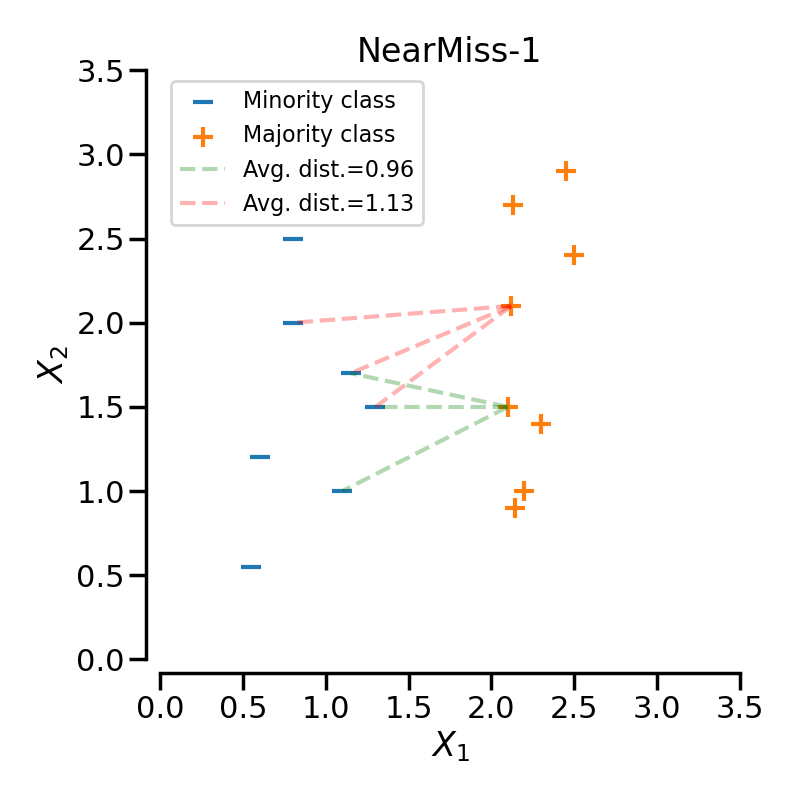

### NearMiss-2
Seleciona os exemplos da classe majoritária que tem a menor distância média dos três exemplos da classe minoritária mais distantes.

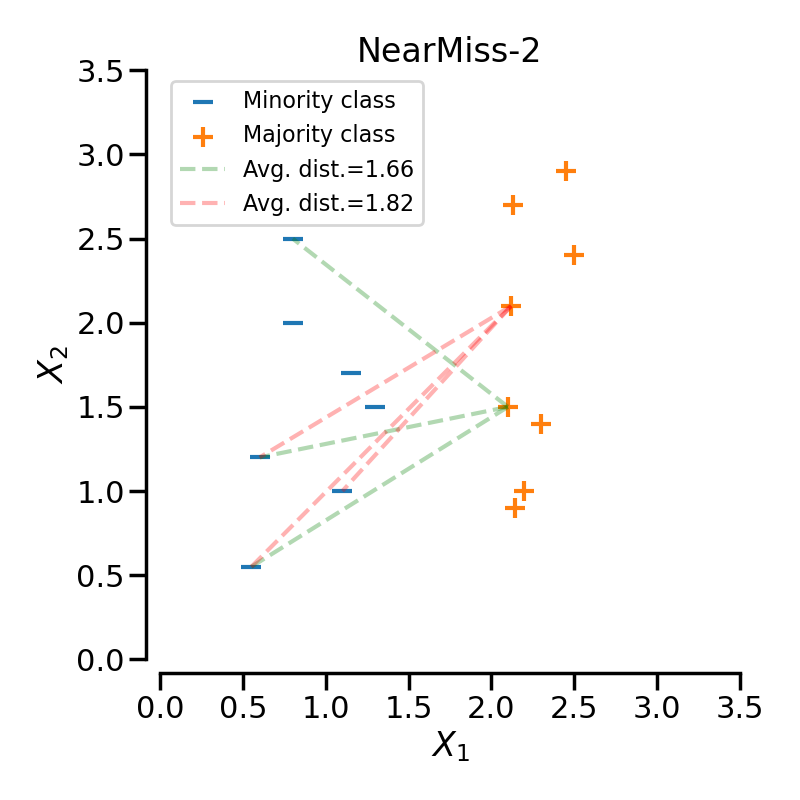

### NearMiss-3
Seleciona um dado número k de exemplos da classe majoritária para cada exemplo da classe minoritária. Entre os k exemplos, é escolhido aquele cuja distância média dos seus 3 vizinhos da classe minoritária mais próximos é a menor.

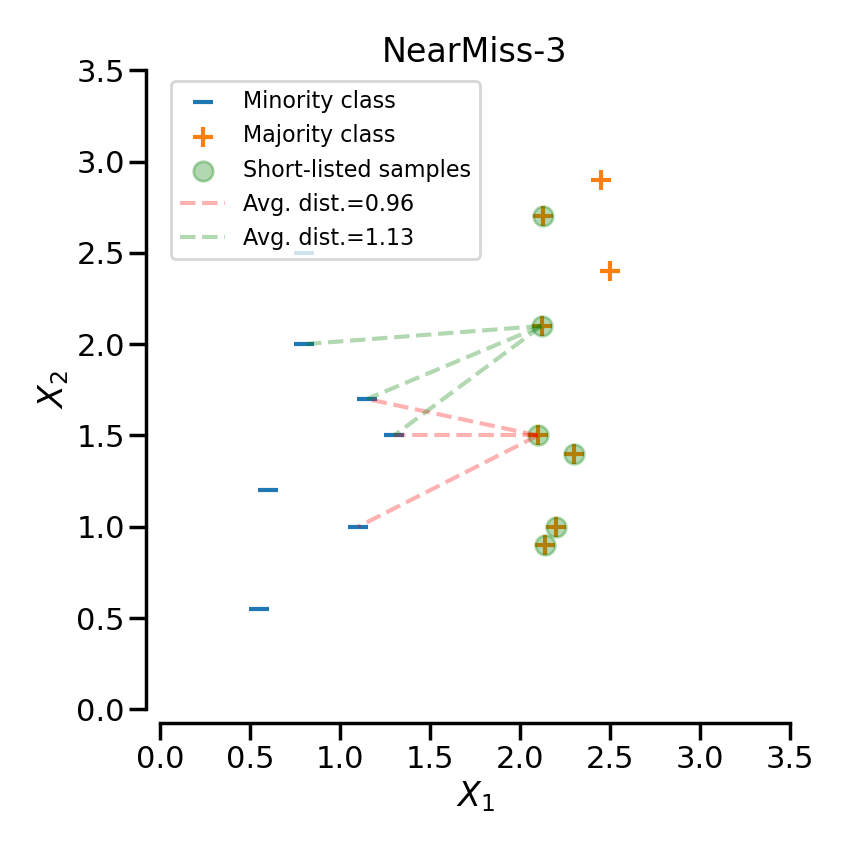

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot as plt
from numpy import where

Counter({0: 9900, 1: 100})


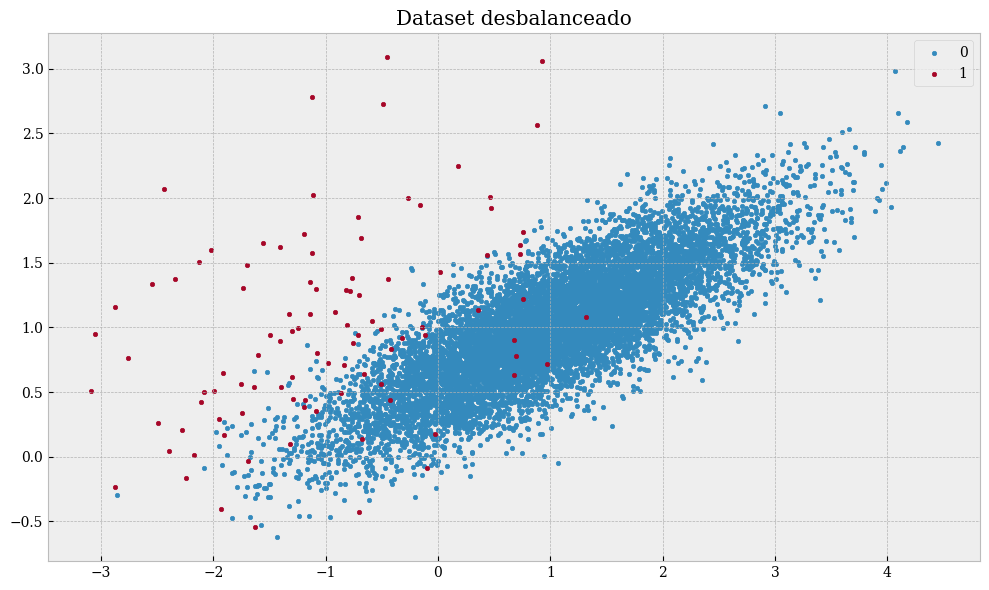

In [ ]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
for label, _ in counter.items():
  row_xi = where(y == label)[0]
  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
plt.title('Dataset desbalanceado')
plt.legend()
plt.tight_layout()
plt.savefig('dsdesbalanceado.png')
plt.show()

Counter({0: 100, 1: 100})


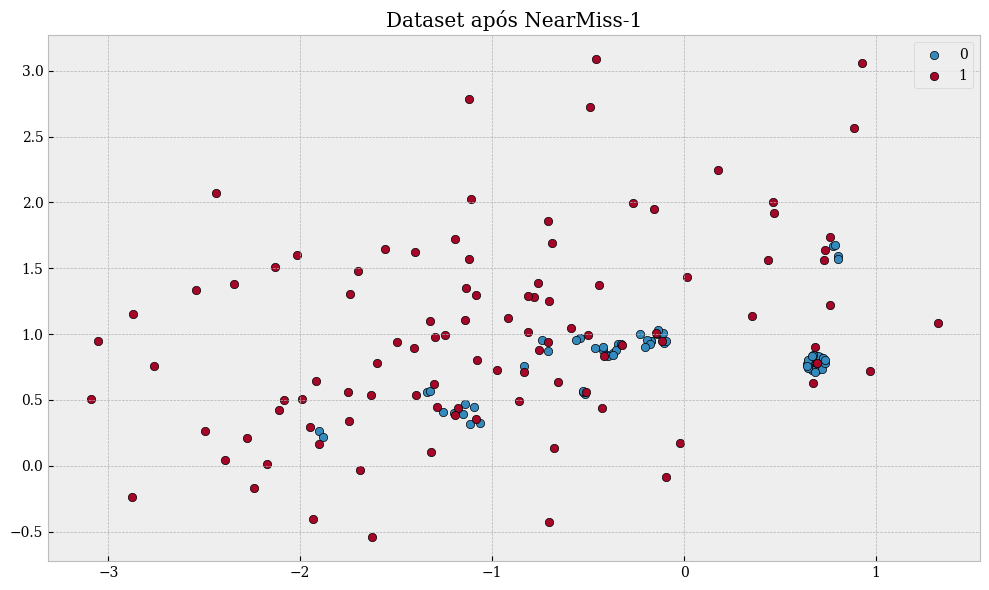

In [ ]:
# NearMiss-1
undersample = NearMiss(version=1)
X_under, y_under = undersample.fit_resample(X, y)

counter= Counter(y_under)
print(counter)

plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  plt.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')

plt.title('Dataset após NearMiss-1')
plt.legend()
plt.tight_layout()
plt.show()

Counter({0: 100, 1: 100})


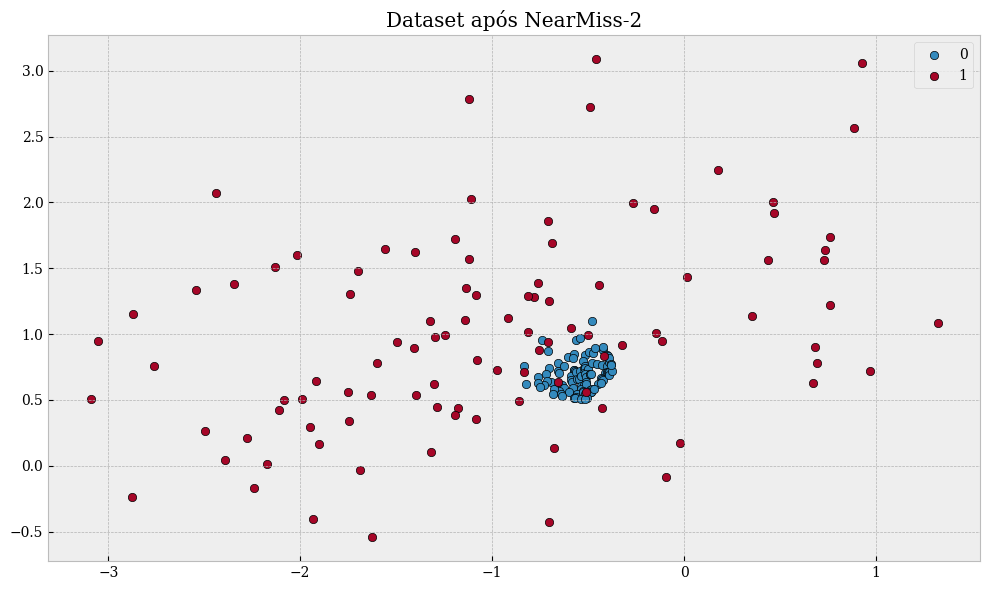

In [ ]:
# NearMiss-2
undersample = NearMiss(version=2)
X_under, y_under = undersample.fit_resample(X, y)

counter= Counter(y_under)
print(counter)

plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  plt.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')

plt.title('Dataset após NearMiss-2')
plt.legend()
plt.tight_layout()
plt.show()

Counter({0: 100, 1: 100})


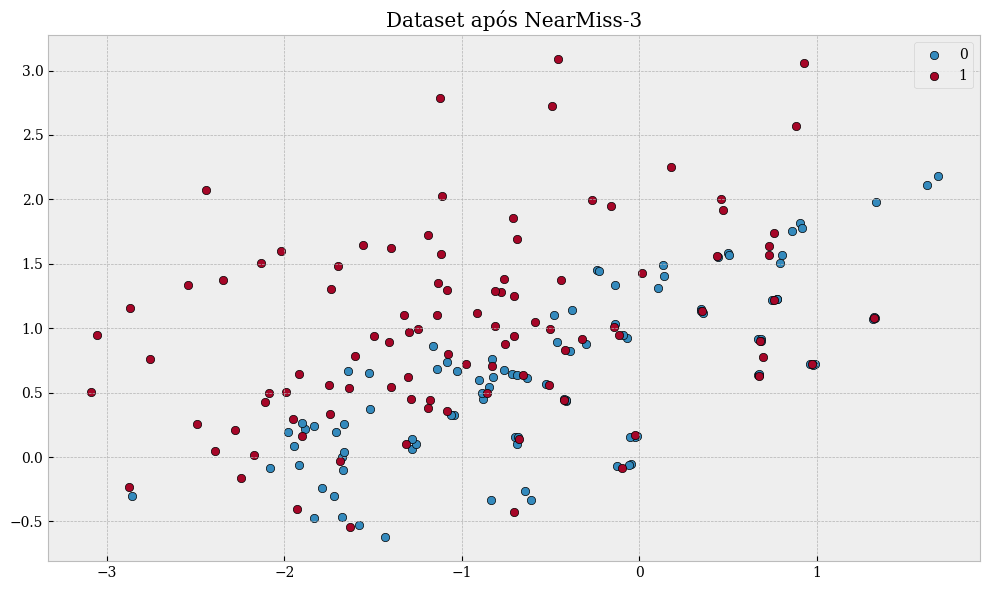

In [ ]:
# NearMiss-3
undersample = NearMiss(version=3)
X_under, y_under = undersample.fit_resample(X, y)

counter= Counter(y_under)
print(counter)

plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_ix = where(y_under == label)[0]
  plt.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label),edgecolors='k')

plt.title('Dataset após NearMiss-3')
plt.legend()
plt.tight_layout()
plt.show()

# Avaliando o NearMiss


## Resultados (Área Sob a Curva ROC média):


| Métodos de data sampling | NearMiss | SMOTE | ADASYN |
| ------------------------ | -------- | ----- | ------ |
| NearMiss 1               |    0.550 | 0.818 | 0.814  |
| NearMiss 2               |    0.473 | 0.829 | 0.818  |
| NearMiss 3               |    0.772 | 0.692 | 0.708  |


----------
NearMiss2 com SMOTE acabou tendo um desempenho melhor que as demais combinações

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
nearmiss_v = [1,2,3]

for v in nearmiss_v:
  model = DecisionTreeClassifier()
  under = NearMiss(version=v)
  steps = [('under', under), ('model', DecisionTreeClassifier())]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
  score = mean(scores)
  print('> v=%d, Mean ROC AUC: %.3f' % (v, score))

> v=1, Mean ROC AUC: 0.550
> v=2, Mean ROC AUC: 0.473
> v=3, Mean ROC AUC: 0.722


## NearMiss + SMOTE

In [ ]:
model = DecisionTreeClassifier()
over = SMOTE()
under = NearMiss(version=1)
steps = [('over', over), ('under', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('> v=%d, Mean ROC AUC: %.3f' % (1, score))

> v=2, Mean ROC AUC: 0.818


In [ ]:
model = DecisionTreeClassifier()
over = SMOTE()
under = NearMiss(version=2)
steps = [('over', over), ('under', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('> v=%d, Mean ROC AUC: %.3f' % (2, score))

> v=2, Mean ROC AUC: 0.829


In [ ]:
model = DecisionTreeClassifier()
over = SMOTE()
under = NearMiss(version=3)
steps = [('over', over), ('under', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('> v=%d, Mean ROC AUC: %.3f' % (3, score))

> v=2, Mean ROC AUC: 0.692


## NearMiss + ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

model = DecisionTreeClassifier()
over = ADASYN()
under = NearMiss(version=2)
steps = [('over', over), ('under', under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
print('> v=%d, Mean ROC AUC: %.3f' % (2, score))